In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller

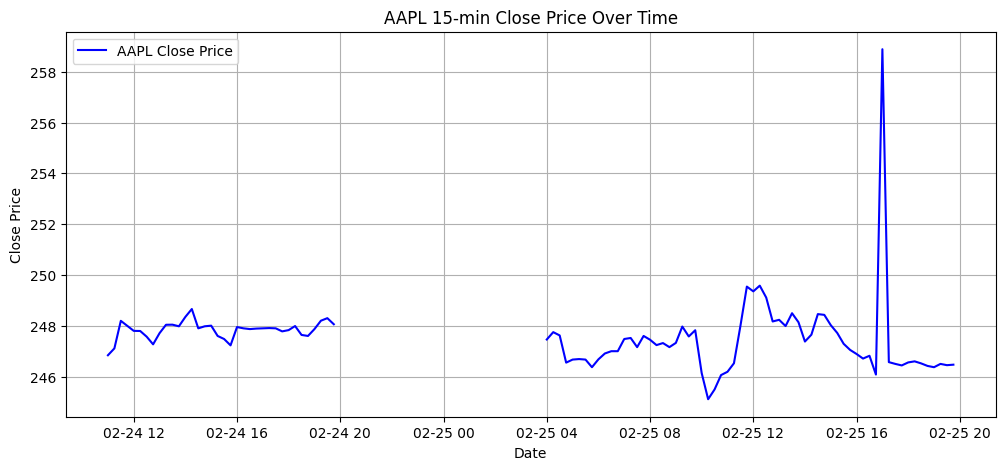

In [9]:
#Input the data
file_path = "ARIMA.csv"
df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

#filter and sort
df_aapl = df[df['symbol'] == 'AAPL'].sort_values(by='date')

# data as index，set time_interval(frequency) as 15min
df_aapl = df_aapl.set_index('date').asfreq('15min')

# The time-series visualize
plt.figure(figsize=(12, 5))
plt.plot(df_aapl['close'], label='AAPL Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('AAPL 15-min Close Price Over Time')
plt.legend()
plt.grid()
plt.show()


In [20]:
# ADF fluctuate test, should take 0.05 as refer value. less than 0.05 is stable,we can reject the hypothesis
adf_result = adfuller(df_aapl['close'].dropna())
print("ADF p-value:", adf_result[1])

#  ARIMA(p,d,q) (p, the data related to the past number p data,
#  d=0,since the data is stable，d=0, otherwise, use the diff, d is the time to use diff
# q, the past q number datapoint of white noise
#diff_series = np.diff(close)

model = ARIMA(df_aapl['close'], order=(10, 0, 1))
result = model.fit()

# the stats
print(result.summary())



ADF p-value: 7.875274804531715e-14
                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  132
Model:                ARIMA(10, 0, 1)   Log Likelihood                -173.669
Date:                Wed, 05 Mar 2025   AIC                            373.339
Time:                        15:40:17   BIC                            410.815
Sample:                    02-24-2025   HQIC                           388.567
                         - 02-25-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        247.5626      0.321    771.248      0.000     246.933     248.192
ar.L1         -0.6637      9.646     -0.069      0.945     -19.569      18.241
ar.L2          0.

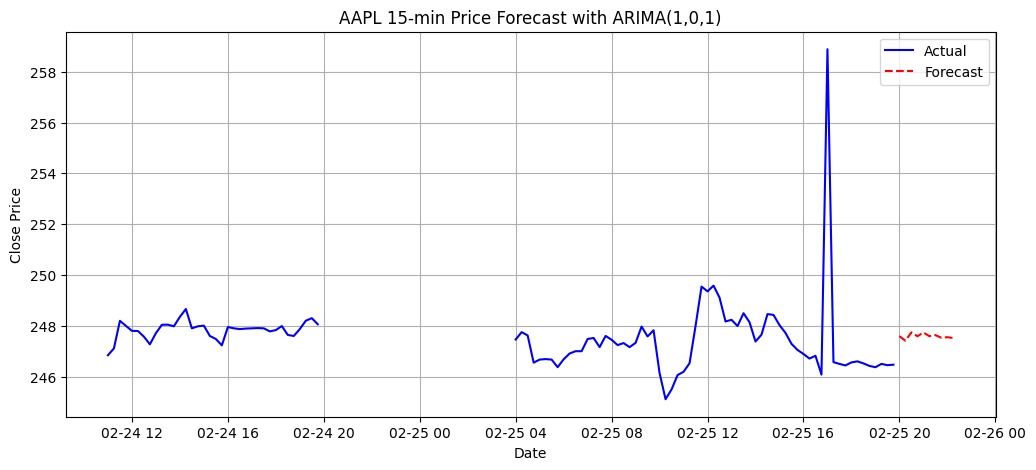

In [21]:
# Forcast
forecast_steps = 10
forecast = result.forecast(steps=forecast_steps)

# Visualize the prediced value.
plt.figure(figsize=(12, 5))
plt.plot(df_aapl['close'], label="Actual", color='blue')
plt.plot(pd.date_range(start=df_aapl.index[-1], periods=forecast_steps+1, freq='15min')[1:],
         forecast, label="Forecast", linestyle="dashed", color='red')
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("AAPL 15-min Price Forecast with ARIMA(1,0,1)")
plt.legend()
plt.grid()
plt.show()